In [0]:
!rm -rf *
!ls

In [2]:
!wget https://github.com/ShahariarRabby/National-Flag-Detection/raw/master/10_country_train_1.zip
!wget https://github.com/ShahariarRabby/National-Flag-Detection/raw/master/10_country_train_2.zip
!wget https://raw.githubusercontent.com/ShahariarRabby/National-Flag-Detection/master/10_country_test.zip

--2018-10-26 12:58:48--  https://github.com/ShahariarRabby/National-Flag-Detection/raw/master/10_country_train_1.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ShahariarRabby/National-Flag-Detection/master/10_country_train_1.zip [following]
--2018-10-26 12:58:49--  https://raw.githubusercontent.com/ShahariarRabby/National-Flag-Detection/master/10_country_train_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48856370 (47M) [application/zip]
Saving to: ‘10_country_train_1.zip’

10_country_train_1. 100%[===================>]  46.59M  94.1MB/s    in 0.5s    

2018-10-26 12:

In [3]:
!unzip 10_country_train_1.zip
!unzip 10_country_train_2.zip
!unzip 10_country_test.zip

Archive:  10_country_train_1.zip
   creating: 10_country_train_1/
   creating: 10_country_train_1/train/
   creating: 10_country_train_1/train/Argentina/
  inflating: 10_country_train_1/train/Argentina/0 (1).jpeg  
  inflating: 10_country_train_1/train/Argentina/0 (1).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (1).png  
  inflating: 10_country_train_1/train/Argentina/0 (10).jpeg  
  inflating: 10_country_train_1/train/Argentina/0 (10).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (10).png  
  inflating: 10_country_train_1/train/Argentina/0 (100).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (101).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (102).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (103).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (104).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (105).jpg  
  inflating: 10_country_train_1/train/Argentina/0 (106).jpg  
  inflating: 10_country_train_1/train/Argentina

In [0]:
!cp -r ./10_country_train_1/* ./10_country_train_2 && rm -R ./10_country_train_1/*

In [5]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

Using TensorFlow backend.


In [6]:
1

1

In [7]:
# Set the CNN model 

model = Sequential()


model.add(Conv2D(activation ='relu', input_shape = (64,64,3), filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=512, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=512, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=128, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=128, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))



model.add(Flatten())
model.add(Dense(units = 100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='softmax', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 512)       295424    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 512)       2359808   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       1179904   
__________

In [8]:
1

1

In [0]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [10]:
1

1

In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [12]:
1

1

In [13]:
train_generator = train_datagen.flow_from_directory(
                                                    '10_country_train_2/train/',
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    '10_country_test/test',
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 4283 images belonging to 10 classes.
Found 1049 images belonging to 10 classes.


In [14]:
1

1

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
1

1

In [18]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=4283 /30,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Epoch 1/50
143/142 [==============================] - 38s 267ms/step - loss: 1.8895 - acc: 0.2954 - val_loss: 1.3377 - val_acc: 0.4456
Epoch 2/50
143/142 [==============================] - 32s 227ms/step - loss: 1.3368 - acc: 0.4760 - val_loss: 0.9439 - val_acc: 0.6057
Epoch 3/50
143/142 [==============================] - 33s 231ms/step - loss: 1.0442 - acc: 0.5933 - val_loss: 0.8145 - val_acc: 0.7465
Epoch 4/50
143/142 [==============================] - 32s 226ms/step - loss: 0.8080 - acc: 0.7136 - val_loss: 0.6724 - val_acc: 0.7592
Epoch 5/50
143/142 [==============================] - 33s 229ms/step - loss: 0.7653 - acc: 0.7270 - val_loss: 0.5212 - val_acc: 0.8012
Epoch 6/50
143/142 [==============================] - 33s 227ms/step - loss: 0.6446 - acc: 0.7767 - val_loss: 0.4955 - val_acc: 0.8432
Epoch 7/50
143/142 [==============================] - 32s 226ms/step - loss: 0.5474 - acc: 0.8393 - val_loss: 0.3625 - val_acc: 0.8899
Epoch 8/50
143/142 [==============================] - 3

In [18]:
1

1

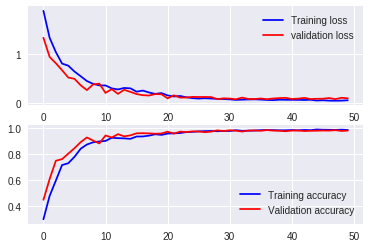

In [19]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [24]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[ 9  7 15 12  8 14 16  7 12 12]
 [ 8 10 14 16  7  7 12  8  4 12]
 [ 9  9  8 13  8  8 13 13  5 16]
 [15 14 10 16 16 10 14 12 14 11]
 [14 10  7  8  8 12 15  6 10  7]
 [15  8  9  8 11  3 13  8  4 10]
 [ 8 14 16 17  4 14 18 12 11 13]
 [ 9  9  5 12 11  8  7  8 13 14]
 [11  6  8 18 13  6  9  5  8  8]
 [11 13 11 11  6  9 10 14 11  8]]
